In [48]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


df=pd.read_csv("./data_formatted/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

df = df.dropna()
df = df[(df.player1_plays > 6) & (df.player2_plays>6)]
df.shape

(36972, 36)

In [49]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating",  "player1_height", "player1_weight", "player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",
        "match_date"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#,  shuffle=False)


In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

col_to_drop = ["player1_name", "player2_name", "match_date"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

scaler = MinMaxScaler()
col_to_minmax_scale = ["player1_plays", "player1_wins", "player1_losses","player1_elo",
                       "player2_plays","player2_wins", "player2_losses", "player2_elo"]
scaler.fit(X_train_filtered[col_to_minmax_scale])
X_train_filtered[col_to_minmax_scale] = scaler.transform(X_train_filtered[col_to_minmax_scale])
X_test_filtered[col_to_minmax_scale] = scaler.transform(X_test_filtered[col_to_minmax_scale])

scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",]
scaler.fit(X_train_filtered[col_to_std_scale])
X_train_filtered[col_to_std_scale] = scaler.transform(X_train_filtered[col_to_std_scale])
X_test_filtered[col_to_std_scale] = scaler.transform(X_test_filtered[col_to_std_scale])

X_train_filtered = pd.DataFrame(X_train_filtered)
X_test_filtered = pd.DataFrame(X_test_filtered)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_elo,player1_mean_serve_rating,player1_height,player1_weight,player1_oddsB365,player2_age,player2_atprank,player2_plays,player2_wins,player2_losses,player2_elo,player2_mean_serve_rating,player2_height,player2_weight,player2_oddsB365
41326,1.213988,-0.445859,0.591304,0.444556,0.589372,0.930139,0.462268,-0.445557,-0.269890,-0.453776,1.040047,0.109251,0.378144,0.219316,0.539952,-0.147178,0.541537,0.221535,-0.816510,0.052462
38000,-0.938473,-0.736580,0.165217,0.125000,0.171498,1.042936,0.255317,-0.175087,-0.269890,-0.562741,-0.552125,0.318254,0.018213,0.009054,0.041162,-0.665105,-0.747064,-0.175577,-0.272673,0.934313
50781,-0.681720,0.069510,0.081739,0.043347,0.135266,-0.685796,-1.077427,-0.445557,-0.815406,-0.235845,1.257348,-0.322689,0.385082,0.265594,0.447942,-0.246827,-0.660293,-0.837430,-1.496307,-0.319875
49086,0.270264,1.919552,0.025217,0.009073,0.060386,-0.585260,-0.520848,-0.445557,-0.133511,0.005435,-0.820675,-0.266955,0.095403,0.057344,0.140436,-0.720465,1.045270,0.221535,-1.088429,-0.437455
12841,0.271641,0.611308,0.081739,0.034274,0.157005,-0.938363,-0.524496,-0.175087,0.684763,-0.496583,-0.156473,3.118899,0.026886,0.018109,0.043584,-0.455966,-2.311609,-0.440318,-0.408632,0.150446


Epoch 1/100
858/925 [==========================>...] - ETA: 0s - loss: 0.1562 - accuracy: 0.6509
Epoch 1: accuracy improved from -inf to 0.65345, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 2s 1ms/step - loss: 0.1557 - accuracy: 0.6534 - val_loss: 0.1497 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 2/100
866/925 [===========================>..] - ETA: 0s - loss: 0.1492 - accuracy: 0.6807
Epoch 2: accuracy improved from 0.65345 to 0.67931, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1496 - accuracy: 0.6793 - val_loss: 0.1487 - val_accuracy: 0.6915 - lr: 0.0010
Epoch 3/100
880/925 [===========================>..] - ETA: 0s - loss: 0.1485 - accuracy: 0.6842
Epoch 3: accuracy improved from 0.67931 to 0.68388, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1486 - accuracy: 0.6839 - val_loss: 0.1485 - val_accuracy: 0.6855 - lr: 0.0010
Epoch 4/100
872/925 [===========================>..] - ETA: 0s - loss: 0.1484 - accuracy: 0.6838
Epoch 4: accuracy improved from 0.68388 to 0.68445, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1483 - accuracy: 0.6845 - val_loss: 0.1475 - val_accuracy: 0.6921 - lr: 0.0010
Epoch 5/100
861/925 [==========================>...] - ETA: 0s - loss: 0.1478 - accuracy: 0.6874
Epoch 5: accuracy improved from 0.68445 to 0.68766, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1478 - accuracy: 0.6877 - val_loss: 0.1482 - val_accuracy: 0.6813 - lr: 0.0010
Epoch 6/100
873/925 [===========================>..] - ETA: 0s - loss: 0.1476 - accuracy: 0.6878
Epoch 6: accuracy did not improve from 0.68766
925/925 [==============================] - 1s 778us/step - loss: 0.1477 - accuracy: 0.6876 - val_loss: 0.1475 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 7/100
866/925 [===========================>..] - ETA: 0s - loss: 0.1474 - accuracy: 0.6870
Epoch 7: accuracy did not improve from 0.68766
925/925 [==============================] - 1s 782us/step - loss: 0.1475 - accuracy: 0.6869 - val_loss: 0.1475 - val_accuracy: 0.6876 - lr: 0.0010
Epoch 8/100
880/925 [===========================>..] - ETA: 0s - loss: 0.1471 - accuracy: 0.6899
Epoch 8: accuracy improved from 0.68766 to 0.68939, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1474 - accuracy: 0.6894 - val_loss: 0.1477 - val_accuracy: 0.6884 - lr: 0.0010
Epoch 9/100
865/925 [===========================>..] - ETA: 0s - loss: 0.1475 - accuracy: 0.6883
Epoch 9: accuracy did not improve from 0.68939
925/925 [==============================] - 1s 785us/step - loss: 0.1474 - accuracy: 0.6883 - val_loss: 0.1476 - val_accuracy: 0.6837 - lr: 0.0010
Epoch 10/100
874/925 [===========================>..] - ETA: 0s - loss: 0.1472 - accuracy: 0.6892
Epoch 10: accuracy did not improve from 0.68939
925/925 [==============================] - 1s 773us/step - loss: 0.1472 - accuracy: 0.6892 - val_loss: 0.1476 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 11/100
889/925 [===========================>..] - ETA: 0s - loss: 0.1469 - accuracy: 0.6876
Epoch 11: accuracy did not improve from 0.68939
925/925 [==============================] - 1s 769us/step - loss: 0.1471 - accuracy: 0.6876 - val_loss: 0.1476 - val_accuracy: 0.

INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1470 - accuracy: 0.6896 - val_loss: 0.1473 - val_accuracy: 0.6895 - lr: 0.0010
Epoch 14/100
864/925 [===========================>..] - ETA: 0s - loss: 0.1468 - accuracy: 0.6910
Epoch 14: accuracy improved from 0.68956 to 0.69131, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1468 - accuracy: 0.6913 - val_loss: 0.1479 - val_accuracy: 0.6876 - lr: 0.0010
Epoch 15/100
857/925 [==========================>...] - ETA: 0s - loss: 0.1469 - accuracy: 0.6902
Epoch 15: accuracy did not improve from 0.69131
925/925 [==============================] - 1s 787us/step - loss: 0.1468 - accuracy: 0.6898 - val_loss: 0.1478 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 16/100
873/925 [===========================>..] - ETA: 0s - loss: 0.1468 - accuracy: 0.6900
Epoch 16: accuracy did not improve from 0.69131
925/925 [==============================] - 1s 781us/step - loss: 0.1469 - accuracy: 0.6895 - val_loss: 0.1473 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 17/100
870/925 [===========================>..] - ETA: 0s - loss: 0.1466 - accuracy: 0.6903
Epoch 17: accuracy did not improve from 0.69131
925/925 [==============================] - 1s 781us/step - loss: 0.1467 - accuracy: 0.6907 - val_loss: 0.1473 - val_accuracy: 

INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1467 - accuracy: 0.6919 - val_loss: 0.1476 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 19/100
873/925 [===========================>..] - ETA: 0s - loss: 0.1466 - accuracy: 0.6907
Epoch 19: accuracy did not improve from 0.69192
925/925 [==============================] - 1s 776us/step - loss: 0.1467 - accuracy: 0.6906 - val_loss: 0.1475 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 20/100
911/925 [============================>.] - ETA: 0s - loss: 0.1467 - accuracy: 0.6915
Epoch 20: accuracy did not improve from 0.69192
925/925 [==============================] - 1s 805us/step - loss: 0.1466 - accuracy: 0.6919 - val_loss: 0.1474 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 21/100
872/925 [===========================>..] - ETA: 0s - loss: 0.1462 - accuracy: 0.6923
Epoch 21: accuracy improved from 0.69192 to 0.69250, saving model to ./models\nn.pkl
INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


INFO:tensorflow:Assets written to: ./models\nn.pkl\assets


925/925 [==============================] - 1s 1ms/step - loss: 0.1464 - accuracy: 0.6925 - val_loss: 0.1478 - val_accuracy: 0.6851 - lr: 0.0010


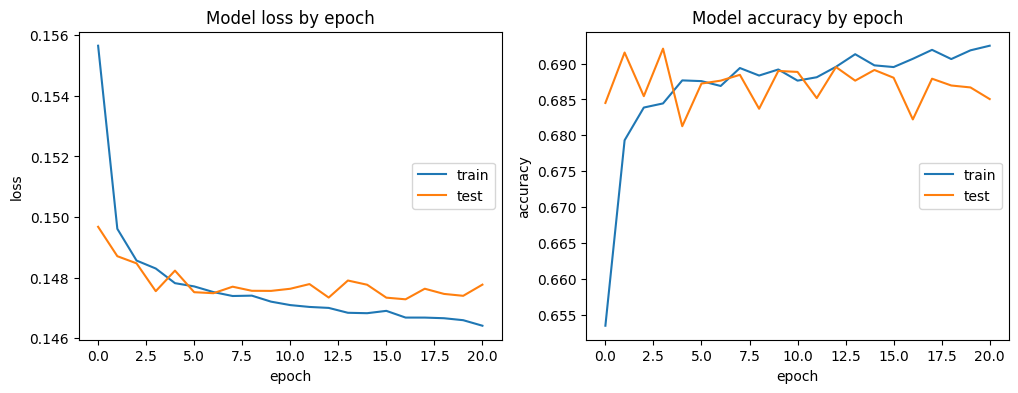

In [74]:
import keras
from keras.layers import Dense
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

earlystopping = keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=10,
    patience=20,
    mode='auto',
    baseline=None
)
model_file = "./models/nn.pkl"
checkpoint = keras.callbacks.ModelCheckpoint(model_file, 
                    monitor="accuracy", mode="max", 
                    save_best_only=True, verbose=1)

reduce_lr  = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=20,
    mode="auto",
    min_delta=0.0001,
    min_lr=0.001,
)


model.compile(optimizer='adam', loss='binary_focal_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train,                    
                        epochs = 100,                         
                        batch_size = 32,
                        callbacks=[earlystopping, reduce_lr,checkpoint],                    
                        validation_data=(X_test_filtered, y_test))   

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
model.load_weights(model_file)
y_predict = model.predict(X_test_filtered)

print('Accuracy :', accuracy_score(y_predict.round(), y_test))

232/232 [==============================] - 0s 485us/step
Accuracy : 0.6850574712643678


In [76]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()
df_roi[["player1_name","player1_oddsB365","player2_name","player2_oddsB365", "y_test", "proba_bookmaker", "y_predict", "y_predict_proba",]]


,player1_name,player1_oddsB365,player2_name,player2_oddsB365,y_test,proba_bookmaker,y_predict,y_predict_proba
30186,Tommy Haas,1.16,Daniel Brands,5.00,1,1.0,1.0,0.602568
14847,Igor Kunitsyn,3.00,Nicolas Mahut,1.36,0,0.0,0.0,0.407769
37494,Gael Monfils,1.50,David Goffin,2.50,0,1.0,1.0,0.538749
46594,Diego Schwartzman,1.53,Casper Ruud,2.50,0,1.0,1.0,0.584049
36188,Marco Cecchinato,1.57,Igor Sijsling,2.25,0,1.0,1.0,0.513516
...,...,...,...,...,...,...,...,...
50108,Daniel Evans,1.80,Miomir Kecmanovic,2.00,0,1.0,1.0,0.527144
27046,Carlos Berlocq,2.10,Mikhail Kukushkin,1.66,1,0.0,0.0,0.461391
48005,Alexei Popyrin,1.57,James Duckworth,2.37,0,1.0,1.0,0.541909
6760,Marat Safin,1.10,Paradorn Srichaphan,6.50,1,1.0,1.0,0.653677


In [83]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi= df_roi.loc[df_roi["y_predict_proba"]>0.8]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if row.y_predict == row.y_test :
        if row.y_predict == 0 :
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

money spent: 39 €
money won: 38.36 €
TOTAL: -0.64 €
ROI: 98.37 %
